In [1]:
'''

load original df

'''

import pandas as pd
import os
import numpy as np
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings('ignore') #supresses warnings for now
#warnings.filterwarnings(action='once') #shows warnings once

dataFilePath = os.path.join(os.getcwd(),'Data')

kicsSVdf = pd.read_csv(os.path.join(dataFilePath,'kics_structural_variations.txt'), sep = '\t', header = 0)
#kicsTEdf = pd.read_csv(os.path.join(dataFilePath,'kics_transposable_elements.txt'), sep = '\t', header = 0)
lfsSVdf = pd.read_csv(os.path.join(dataFilePath,'lfs_structural_variations.txt'), sep = '\t', header = 0)
#lfsTEdf = pd.read_csv(os.path.join(dataFilePath,'lfs_transposable_elements.txt'), sep = '\t', header = 0)
kicsClinicdf = pd.read_csv(os.path.join(dataFilePath,'kics_clinical_main.tsv'), sep = '\t', header = 0)
lfsClinicdf = pd.read_csv(os.path.join(dataFilePath,'lfs_clinical_main.tsv'), sep = '\t', header = 0)

In [2]:
"""

filter dfs

"""

kicsSVF = kicsSVdf.loc[kicsSVdf['AnnotSV type'] == 'full']
lfsSVF = lfsSVdf.loc[lfsSVdf['AnnotSV type'] == 'full']

kicsSVF['SV chrom'] = kicsSVF['SV chrom'].astype(str)
lfsSVF['SV chrom'] = lfsSVF['SV chrom'].astype(str)

kicsSVnum = kicsSVF['sample_id'].count()
lfsSVnum = lfsSVF['sample_id'].count()

#print(kicsSVnum, lfsSVnum)

#to improve this, multi-index would be good, that way we can have less columns
mergedSVdf = pd.DataFrame(data = {'kics':kicsSVF['SV type'], 'kChrom':kicsSVF['SV chrom'], 
                                  'kId':kicsSVF['sample_id'], 'lId':lfsSVF['sample_id'],
                                  'lfs':lfsSVF['SV type'], 'lChrom':lfsSVF['SV chrom']})

#print(mergedSVdf.head(30))

#print(kicsClinicdf.columns)#['WGS-Id'].value_counts())#head(50))
#print(mergedSVdf['kId'].value_counts())#head(50))


In [3]:
"""

1. Graph for frequency of SV types
2. Graphs for frequency of SV types specific to chromosomes

Function to graph bar graphs

"""
from matplotlib import pyplot as plt

def BarGraphNormalized(label1: str, label2:str, df: pd.DataFrame, col1: str, col2: str,
                        xTitle: str, yTitle: str, divisor1: float, divisor2: float,
                        labels: list):
    #'kics', 'lfs', invdf, 'kchrom', 'lchrom', 'Chromosomes','Frequency','Graph2-INV',kicsSVnum, lfsSVnum

    title = label1 + " " + label2
    count1 = df[col1].value_counts()
    count2 = df[col2].value_counts()
    
    x_axis = np.arange(len(labels))
        
    for i in labels:
        if (not(i in count1)):
            add = pd.Series([0], index=[i])
            count1 = count1.append(add)
        if (not(i in count2)):
            add = pd.Series([0], index=[i])
            count2 = count2.append(add)
    
    plt.bar(x_axis - 0.2, [count1[a] for a in labels]/divisor1, 0.4, label = label1)
    plt.bar(x_axis + 0.2, [count2[a] for a in labels]/divisor2, 0.4, label = label2)

    plt.xticks(x_axis, labels)
    plt.xlabel(xTitle)
    plt.ylabel(yTitle)
    plt.title(title)
    plt.legend()
    plt.show()
    
xLabels = ['DEL','DUP','INV']
uniqueLabels = ['1','2','3','4','5','6','7','8','9','10',
                '11','12','13','14','15','16','17','18','19','20','21','22','X','Y']

deldf = mergedSVdf.loc[(mergedSVdf['kics'] == 'DEL') | (mergedSVdf['lfs']=='DEL')]
dupdf = mergedSVdf.loc[(mergedSVdf['kics'] == 'DUP') | (mergedSVdf['lfs']=='DUP')]
invdf = mergedSVdf.loc[(mergedSVdf['kics'] == 'INV') | (mergedSVdf['lfs']=='INV')]

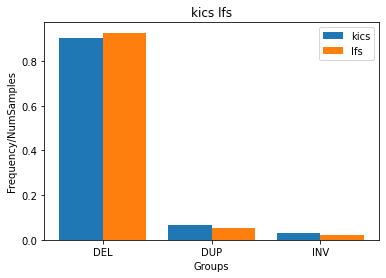

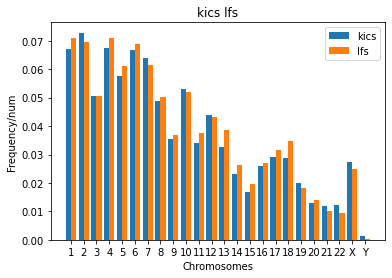

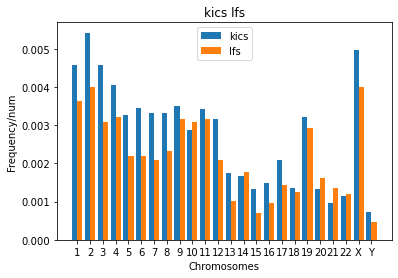

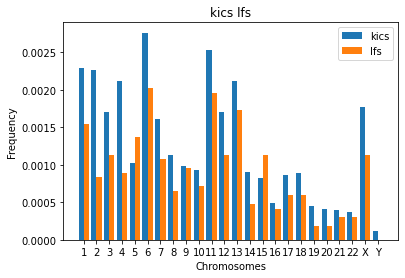

In [4]:
#Overall
BarGraphNormalized('kics', 'lfs', mergedSVdf, 'kics', 'lfs', 'Groups', 'Frequency/NumSamples', 
                   kicsSVnum, lfsSVnum, xLabels)

#Deletions 
BarGraphNormalized('kics', 'lfs', deldf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency/num', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

#Duplicates
BarGraphNormalized('kics', 'lfs', dupdf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency/num', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

#Inversions
BarGraphNormalized('kics', 'lfs', invdf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

In [5]:
'''
location is put on hold for now since intron3 - intron5 does not mean it only impacts introns, may also impact exons
'''

# #LOCATION 
# mergedLocdf = pd.DataFrame(data={'kics':kicsSVR['location'], 'lfs':lfsSVR['location'], 
#                                  'kId':kicsSVR['sample_id'], 'lId':lfsSVR['sample_id']})

# kicsLocdf = pd.DataFrame(data={'loc':kicsSVR['location'], 'id':kicsSVR['sample_id']})
# lfsLocdf = pd.DataFrame(data={'loc':lfsSVR['location'], 'id':lfsSVR['sample_id']})

# kicsLocdf[['start','end']] = kicsLocdf['loc'].str.split('-', expand=True)
# lfsLocdf[['start','end']] = lfsLocdf['loc'].str.split('-', expand=True)


# def locationType(row):
#     if ('tx' in row['start'] or 'tx' in row['end']): 
#         return 'All'
        
#     elif('intron' in row['start'] and 'intron' in row['end']):
#          return 'intron'

#     elif('exon' in row['start'] and 'exon' in row['end']):
#          return 'exon'
            
#     else:
#         return 'intron and exon'

# #print(kicsLocdf)
# kicsLocdf['locType'] = kicsLocdf.apply(lambda row: locationType(row), axis=1)
# lfsLocdf['locType'] = lfsLocdf.apply(lambda row: locationType(row), axis=1)

# kicsTry = kicsLocdf.groupby(['id','locType']).size().unstack(fill_value=0)
# lfsTry = lfsLocdf.groupby(['id','locType']).size().unstack(fill_value=0)

# kicsTry['dataset'] = 'kics'

# lfsTry['dataset'] = 'lfs'

# tryMerge = pd.concat([kicsTry, lfsTry])
# print(kicsTry)

# sns.boxplot(data=tryMerge, x=)
# # newMergedDf.rename(columns = {0:'occ'}, inplace = True)
# # newMergedDf.reset_index(inplace=True)
# # newMergedDf.rename(columns = {'index':'chrom'}, inplace = True)

# sns.boxplot(data=tryMerge, x='location', y='occ', hue='dataset', palette='spring')

# #plt.show()
        
# # for i in kicsLocdf['kics']: 
# #     start,end = i.split("-") 
# #     tempList.append((start,end)) 
# #     if (start.contains('tx') or end.contains('tx')): 
# #         tempList2.append('All')
# #     elif(start.contains('intron') and end.contains('intron')):
# #          tempList2.append('intron')

# #     elif(start.contains('exon') and end.contains('exon')):
# #          tempList2.append('exon')

# #     else:
# #         tempList2.append("intron and exon")
# # print(kicsLocdf)

'\nlocation is put on hold for now since intron3 - intron5 does not mean it only impacts introns, may also impact exons\n'

MannwhitneyuResult(statistic=181443634.5, pvalue=2.727488671941287e-152)


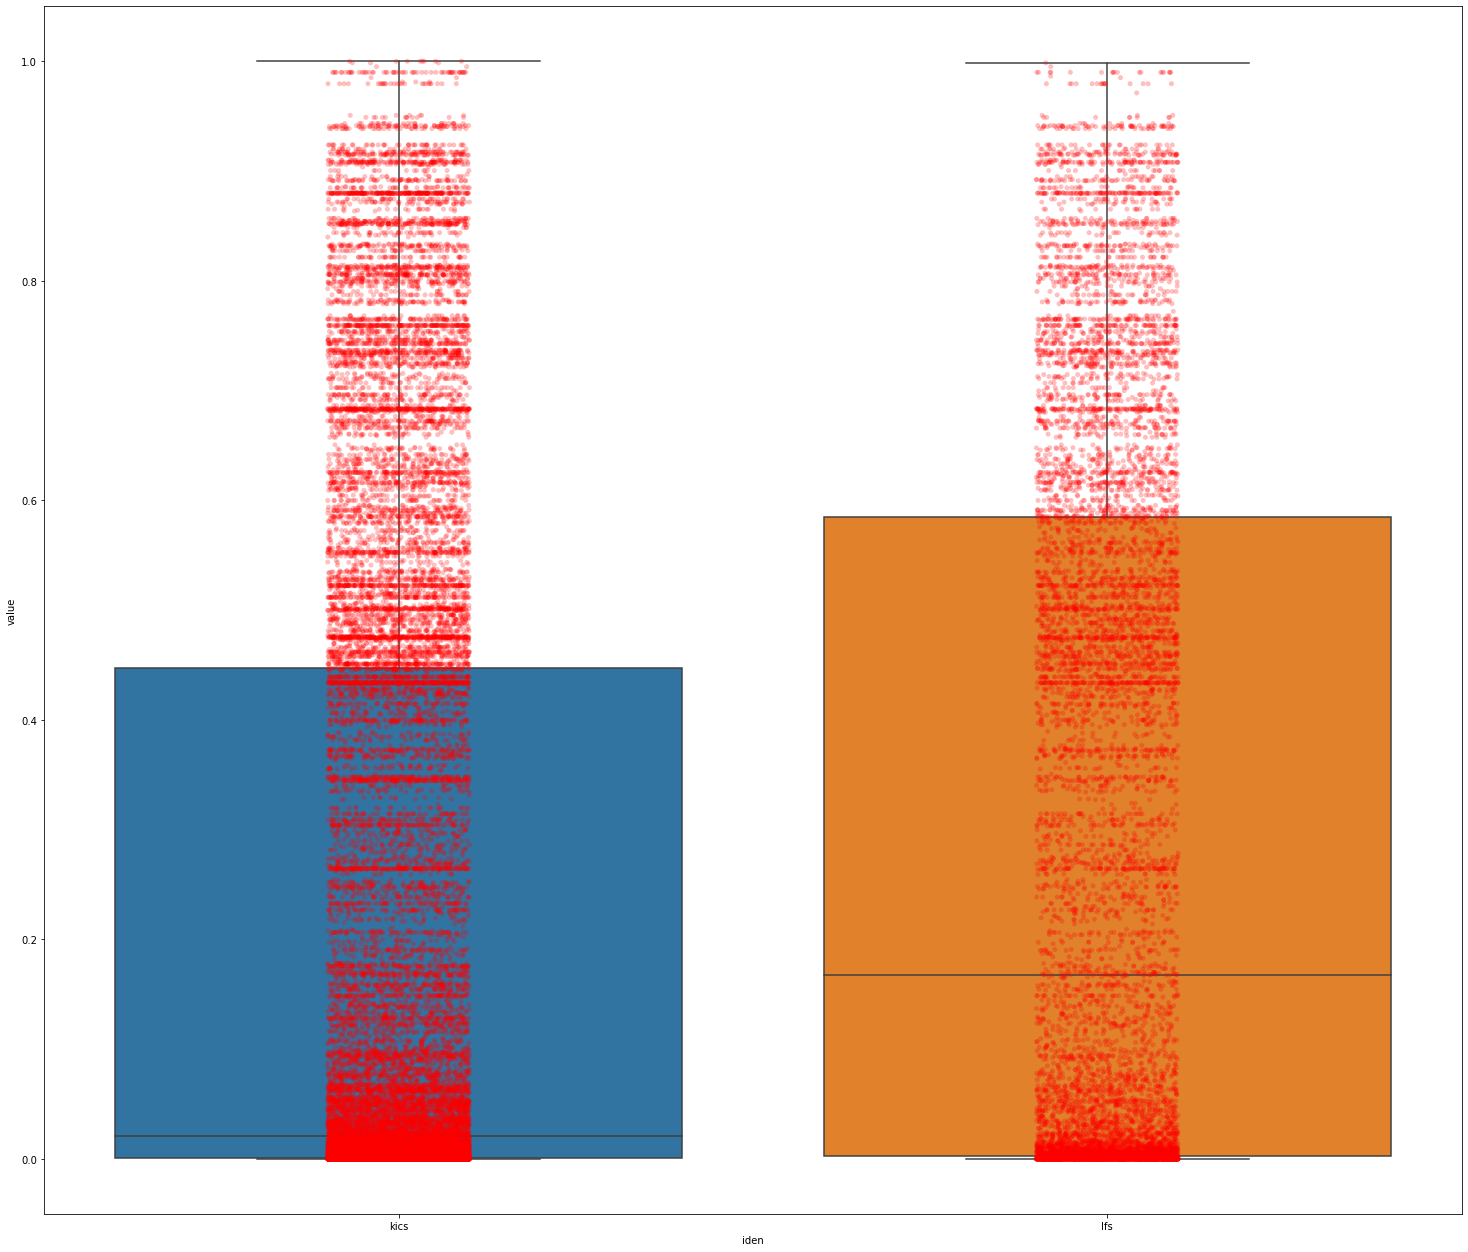

In [6]:
global mergedGDAF 
mergedGDAF = pd.DataFrame(data = {'kics':kicsSVF['GD_AF'],
                                'lfs':lfsSVF['GD_AF']})

mergedGDAF.replace(to_replace = [-1], value = np.nan, inplace=True)
mergedGDAF.replace(to_replace = ['-1'], value = np.nan, inplace=True)


def maxGDAFFilter(colName: str, df: pd.DataFrame):
    temp = df[colName].str.contains(pat=',')
    Index = list(np.where(temp == True)[0])
    temp = df[colName].iloc[Index]
    tempIndex = temp.index

    for i in tempIndex:
        tempList = temp[i].split(',')
        tempList = [float(a) for a in tempList]
        maxTemp = max(tempList)
        df[colName][i] = maxTemp

    df[colName] = df[colName].astype('float64')
    
maxGDAFFilter('kics', mergedGDAF)
maxGDAFFilter('lfs', mergedGDAF)
mergedGDAF.loc[mergedGDAF['kics'] < 0, 'kics'] = np.nan
mergedGDAF.loc[mergedGDAF['lfs'] < 0, 'lfs'] = np.nan

import seaborn as sns
def BoxGraphMulti(df: pd.DataFrame, xCol, yCol, compCol):
    sns.boxplot(data=df, x=xCol, y=yCol, hue=compCol, palette='spring')
    #plt.show()

def boxplotPoints(title:list, column:list, df: pd.DataFrame , sizeH=20.50, sizeV=17.50, col='red', trans=0.25):
    plt.rcParams["figure.figsize"] = [sizeH, sizeV]
    plt.rcParams["figure.autolayout"] = True
    data = pd.DataFrame({
        t: df[c] for t,c in zip(title, column)})
    
    #print(data)
    plotTest = data
    plotTest = plotTest.stack().to_frame().reset_index().rename(columns={'level_1': 'iden', 0: 'value'}).drop('level_0', axis='columns')
    plotTest['cat'] = 1
    #print(plotTest.head(50))
    #data.boxplot()
    #BoxGraphMulti(plotTest, 'cat', 'value', 'iden')
    sns.boxplot(data=plotTest, x='iden', y='value')
    
    #plot with boxplot
    sns.stripplot(x = 'iden',
              y = 'value',
                  color = 'red',
                  alpha = 0.25,
              data = plotTest)
    
#     for i, d in enumerate(data):
#         print(i)
#         y = data[d]
#         x = np.random.normal(i, 0.04, len(y))
#         plt.scatter(x, y, color = col, alpha = trans)
    
    list1 = df[column[0]].dropna()
    list2 = df[column[1]].dropna()
    print(mannwhitneyu(list1,list2))
    plt.show()
    

titles = ['kics','lfs']
columns = titles

boxplotPoints(titles, columns, mergedGDAF)


MannwhitneyuResult(statistic=10247.5, pvalue=0.95350437702029)


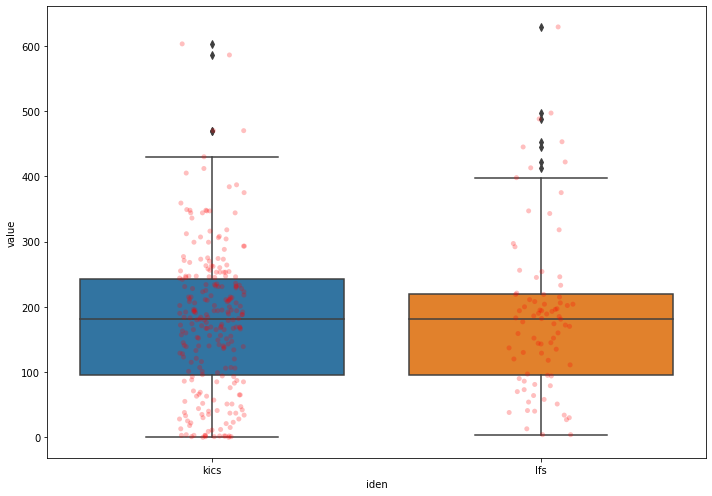

MannwhitneyuResult(statistic=12219.0, pvalue=0.01059563870641659)


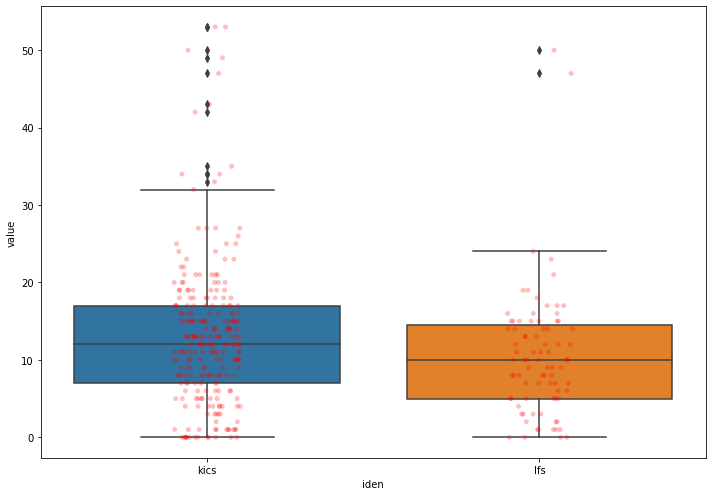

MannwhitneyuResult(statistic=12879.5, pvalue=0.0005797732793708371)


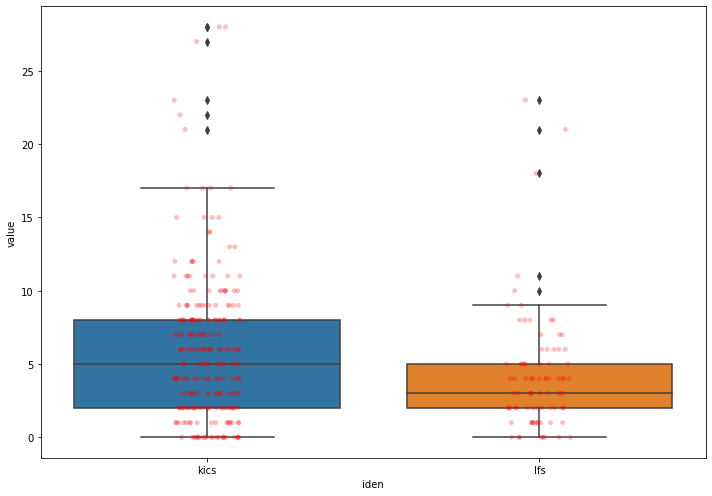

In [7]:
"""

Testing group by

"""
#probably a better way to do this

kicsSVTypedf = pd.DataFrame(data = {'kics':kicsSVF['SV type'], 
                                  'kId':kicsSVF['sample_id']})
lfsSVTypedf = pd.DataFrame(data = {'lId':lfsSVF['sample_id'],
                                  'lfs':lfsSVF['SV type']})

#temp = mergedSVdf.groupby(['kId']).value_counts() #not sure how to use this, unsure if it's missing anything

##kics
ktemp = kicsSVTypedf.groupby(['kId']).value_counts()

##lfs
ltemp = lfsSVTypedf.groupby(['lId']).value_counts()

#print(ktemp.head(30))
#print(ktemp.index.get_level_values(0))

#get unique identifiers

uniqueK = kicsSVTypedf['kId'].unique()
uniqueL = lfsSVTypedf['lId'].unique()

#probably a better way, but itterate through the series and get the data 

def makeDataSet(identifiers, series: pd.Series, secondIndex: str)->list:
    
    dataList = []
    
    for i in identifiers:
        try:
            dataList.append(series[(i, secondIndex)])
        except:
            #pass
            dataList.append(0)

    return(dataList)


        
def makeUnequalDF(list1: list, list2: list) -> pd.DataFrame: #only for kics vs lfs D:
    tempDict = dict(kics = list1, lfs = list2)
    df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in tempDict.items()]))
    return df


kDelData = makeDataSet(uniqueK, ktemp, 'DEL')
lDelData = makeDataSet(uniqueL, ltemp, 'DEL')
tempDelDF = makeUnequalDF(kDelData, lDelData)

boxplotPoints(titles, columns, tempDelDF, 10, 7)

kDupData = makeDataSet(uniqueK, ktemp, 'DUP')
lDupData = makeDataSet(uniqueL, ltemp, 'DUP')
tempDupDF = makeUnequalDF(kDupData, lDupData)

boxplotPoints(titles, columns, tempDupDF, 10, 7)

kInvData = makeDataSet(uniqueK, ktemp, 'INV')
lInvData = makeDataSet(uniqueL, ltemp, 'INV')
tempInvDF = makeUnequalDF(kInvData, lInvData)

boxplotPoints(titles, columns, tempInvDF, 10, 7)



In [8]:
"""

Chromosome Specific
Cleaned up

"""
import seaborn as sns

def formatDataFrame(df: pd.DataFrame, groupByList: list, normalizeList: list, 
                    iterateList: list, labels: list, typeSV: str ) -> tuple:
    
    #kicsMore, lfsMore, ['id','SV','chrom'], nomBPChrom, 

    dfGrouped = df.groupby(groupByList).size().unstack(fill_value=0)
    #print(dfGrouped)
    dfReg = pd.DataFrame()
    dfNorm = pd.DataFrame()
    df1WC = pd.DataFrame()
    df2WC = pd.DataFrame()
    
    for i in iterateList:
        tempList = []
        
        try:
            series = dfGrouped.loc[(i,typeSV)]
            #print(series)
            
        except:
            series = pd.Series(0, index=labels)
            
        for j,div in zip(labels, normalizeList):
            tempList.append(series[j]/div)
            
        d = {'chrom':labels, 'normalized':tempList}
        tempdf = pd.DataFrame(d)

        dfNorm = pd.concat([dfNorm, tempdf], axis=0)
        dfReg = pd.concat([dfReg, series], axis=0) 
    
    return(dfReg, dfNorm)

# def BoxGraphMulti(df: pd.DataFrame, xCol, yCol, compCol):
#     sns.boxplot(data=df, x=xCol, y=yCol, hue=compCol, palette='spring')
#     plt.show()
    


kicsMore = pd.DataFrame(data = {'SV':kicsSVF['SV type'], 'chrom':kicsSVF['SV chrom'], 
                                  'id':kicsSVF['sample_id']})
lfsMore = pd.DataFrame(data = {'id':lfsSVF['sample_id'], 'chrom':lfsSVF['SV chrom'],
                                  'SV':lfsSVF['SV type']})

numBPChrom = [249250621, 243199373, 198022430, 191154276, 180915260, 
              171115067, 159138663, 146364022, 141213431, 135534747,
              135006516, 133851895, 115169878, 107349540, 102531392,
              90354753, 81195210, 78077248, 59128983, 63025520,
              48129895, 51304566, 155270560, 59373566]

grouping = ['id', 'SV', 'chrom']


'''
If you have time, you should make it so that the plot can have the points showing/scattered plot
'''


'\nIf you have time, you should make it so that the plot can have the points showing/scattered plot\n'

1
MannwhitneyuResult(statistic=9681.5, pvalue=0.48039876854978214)
2
MannwhitneyuResult(statistic=10696.0, pvalue=0.5135792038996521)
3
MannwhitneyuResult(statistic=10255.5, pvalue=0.9507572604196165)
4
MannwhitneyuResult(statistic=9671.5, pvalue=0.47090216525581174)
5
MannwhitneyuResult(statistic=9916.5, pvalue=0.6948858622606929)
6
MannwhitneyuResult(statistic=9995.5, pvalue=0.7747903799357887)
7
MannwhitneyuResult(statistic=10656.5, pvalue=0.5487869144602031)
8
MannwhitneyuResult(statistic=10244.5, pvalue=0.9625045435631615)
9
MannwhitneyuResult(statistic=9728.0, pvalue=0.5185341065507345)
10
MannwhitneyuResult(statistic=10175.0, pvalue=0.9641189317362134)
11
MannwhitneyuResult(statistic=9349.0, pvalue=0.24846257962709772)
12
MannwhitneyuResult(statistic=10117.5, pvalue=0.9027237420163645)
13
MannwhitneyuResult(statistic=8995.5, pvalue=0.10301888733480287)
14
MannwhitneyuResult(statistic=9247.0, pvalue=0.19559065577593937)
15
MannwhitneyuResult(statistic=9222.5, pvalue=0.18370624330

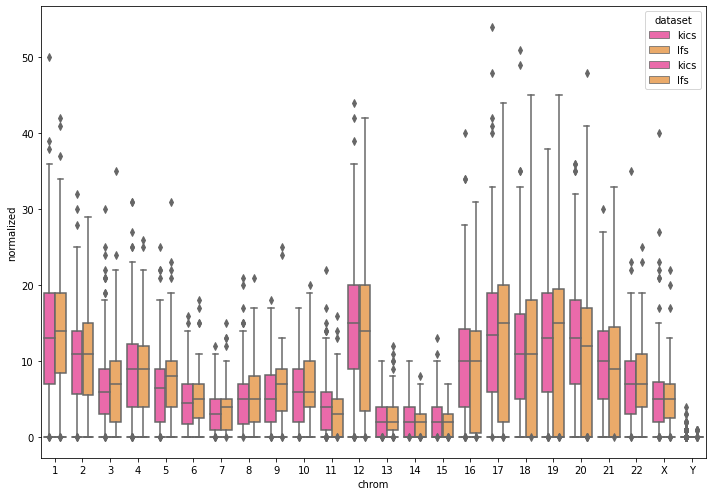

In [9]:
"""
Normalised and Regular Graph
"""

#rename things later and put into function/integrate but this is the statistical test T-T
dog = kicsMore.groupby(grouping).size().unstack(fill_value=0)
dog = dog.stack().unstack(1)
#print(type(dog))
dog = dog.drop(['DUP','INV'], axis=1)
dog = dog.stack().unstack(1)

cat = lfsMore.groupby(grouping).size().unstack(fill_value=0)
cat = cat.stack().unstack(1)
#print(type(dog))
cat = cat.drop(['DUP','INV'], axis=1)
cat = cat.stack().unstack(1)

for i in uniqueLabels:
    print(i)
    print(mannwhitneyu(dog[i].values, cat[i].values))




newKdf, normKdf = formatDataFrame(kicsMore, grouping, numBPChrom, uniqueK, uniqueLabels, 'DEL')
newLdf, normLdf = formatDataFrame(lfsMore, grouping, numBPChrom, uniqueL, uniqueLabels, 'DEL')

#print(newKdf.index)
#print(newKdf.pivot( columns='index', values=0))

newKdf['dataset'] = 'kics'
newLdf['dataset'] = 'lfs'
normKdf['dataset'] = 'kics'
normLdf['dataset'] = 'lfs'

newMergedDf = pd.concat([newKdf, newLdf])
newMergedDf.rename(columns = {0:'occ'}, inplace = True)
newMergedDf.reset_index(inplace=True)
newMergedDf.rename(columns = {'index':'chrom'}, inplace = True)

BoxGraphMulti(newMergedDf, 'chrom', 'occ', 'dataset')

normMergedDf = pd.concat([normKdf, normLdf])
normMergedDf.reset_index(inplace=True)

BoxGraphMulti(normMergedDf, 'chrom', 'normalized', 'dataset')

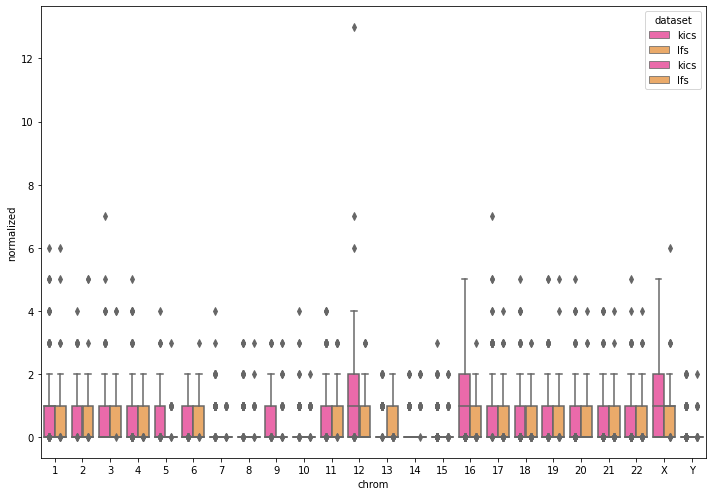

In [10]:
"""

Dup

"""
newKdf, normKdf = formatDataFrame(kicsMore, grouping, numBPChrom, uniqueK, uniqueLabels, 'DUP')
newLdf, normLdf = formatDataFrame(lfsMore, grouping, numBPChrom, uniqueL, uniqueLabels, 'DUP')

newKdf['dataset'] = 'kics'
newLdf['dataset'] = 'lfs'
normKdf['dataset'] = 'kics'
normLdf['dataset'] = 'lfs'

newMergedDf = pd.concat([newKdf, newLdf])
newMergedDf.rename(columns = {0:'occ'}, inplace = True)
newMergedDf.reset_index(inplace=True)
newMergedDf.rename(columns = {'index':'chrom'}, inplace = True)

BoxGraphMulti(newMergedDf, 'chrom', 'occ', 'dataset')

normMergedDf = pd.concat([normKdf, normLdf])
normMergedDf.reset_index(inplace=True)

BoxGraphMulti(normMergedDf, 'chrom', 'normalized', 'dataset')

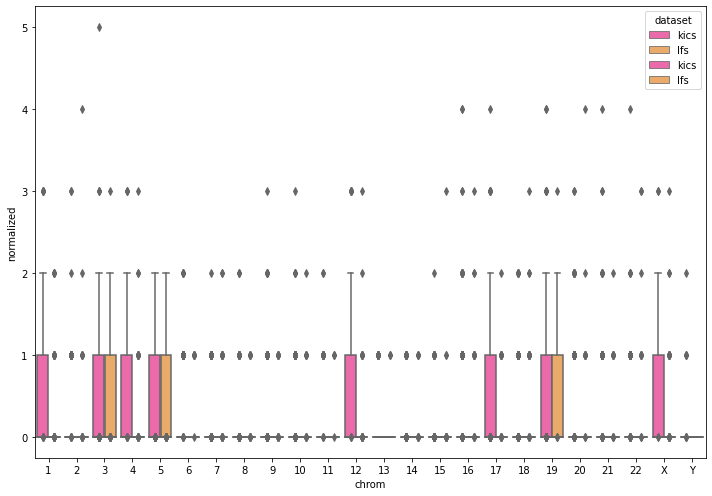

In [11]:
"""

INV

"""

newKdf, normKdf = formatDataFrame(kicsMore, grouping, numBPChrom, uniqueK, uniqueLabels, 'INV')
newLdf, normLdf = formatDataFrame(lfsMore, grouping, numBPChrom, uniqueL, uniqueLabels, 'INV')

newKdf['dataset'] = 'kics'
newLdf['dataset'] = 'lfs'
normKdf['dataset'] = 'kics'
normLdf['dataset'] = 'lfs'

newMergedDf = pd.concat([newKdf, newLdf])
newMergedDf.rename(columns = {0:'occ'}, inplace = True)
newMergedDf.reset_index(inplace=True)
newMergedDf.rename(columns = {'index':'chrom'}, inplace = True)

BoxGraphMulti(newMergedDf, 'chrom', 'occ', 'dataset')

normMergedDf = pd.concat([normKdf, normLdf])
normMergedDf.reset_index(inplace=True)

BoxGraphMulti(normMergedDf, 'chrom', 'normalized', 'dataset')

MannwhitneyuResult(statistic=3598260011791.0, pvalue=0.2938992368946385)


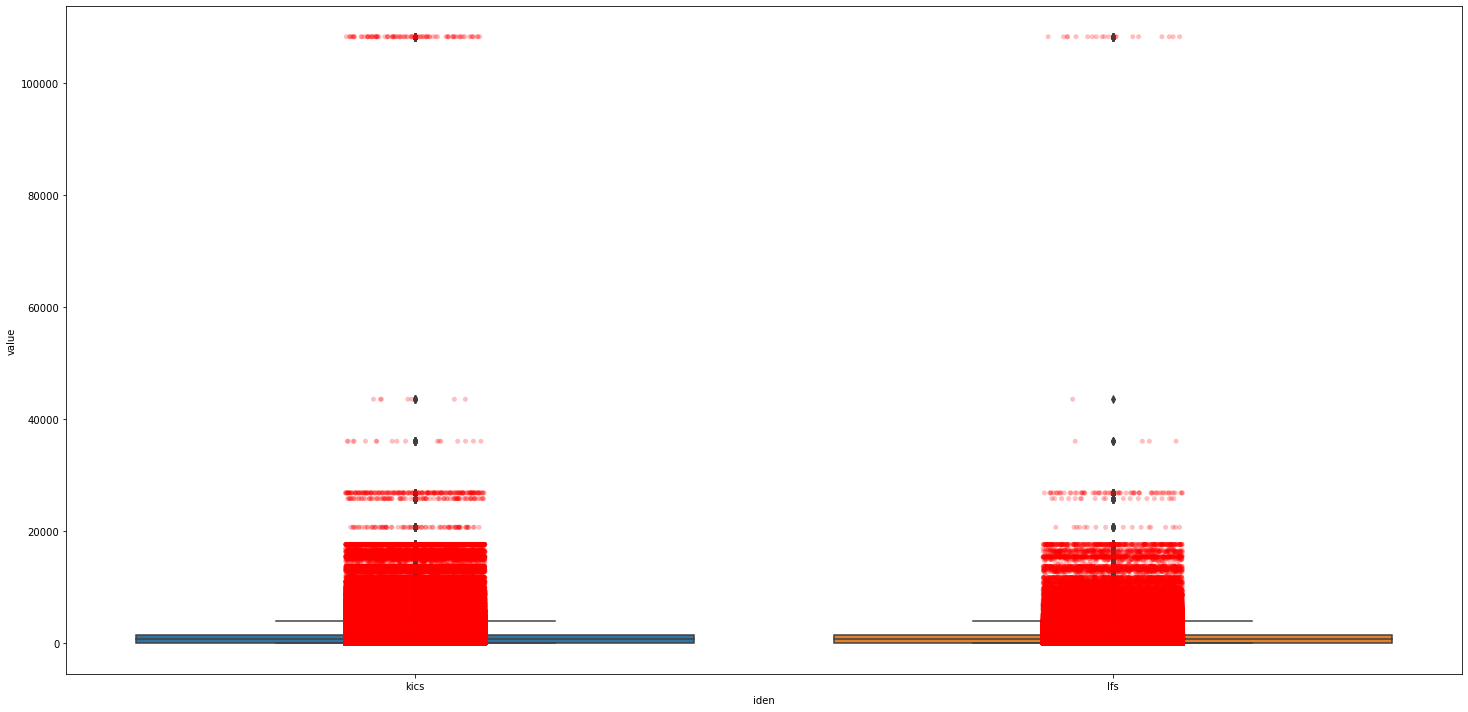

In [12]:
""" filter the df for CDS_length """

kicsSVR = kicsSVdf.loc[kicsSVdf['AnnotSV type'] == 'split'] 
lfsSVR = lfsSVdf.loc[lfsSVdf['AnnotSV type'] == 'split']
mergedCDSdf = pd.DataFrame(data = {'kics':kicsSVR['CDS length'], 'lfs':lfsSVR['CDS length']})
boxplotPoints(titles, columns, mergedCDSdf, sizeV = 10)
#print(mergedCDSdf.head(50)) #they look the same